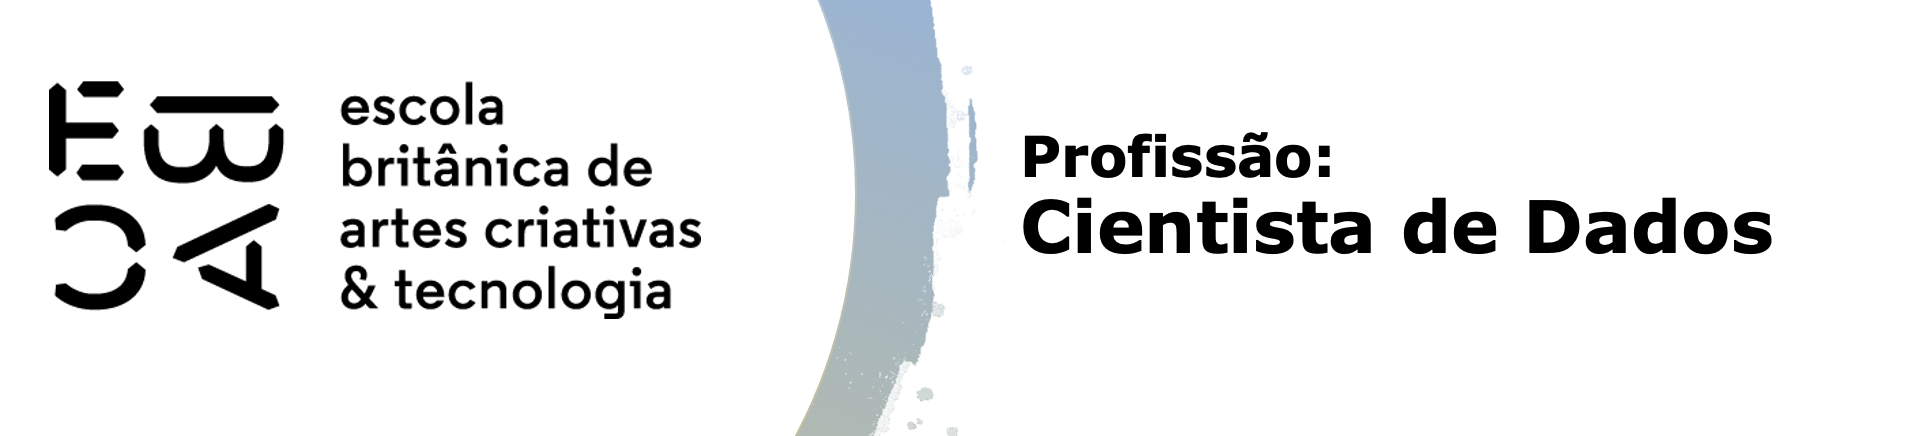

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Carregando as bases X_train, y_train, X_test e y_test
X_train = pd.read_csv('X_train_processed.csv', index_col=[0,1])
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, sep='\s+').iloc[:,0]

X_test = pd.read_csv('X_test_processed.csv', index_col=[0, 1])
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, sep='\s+').iloc[:, 0]

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [3]:
# Selecionando as melhores variáveis
X_train_best = X_train[["(53, 'tGravityAcc-min()-X')", "(272, 'fBodyAcc-mad()-X')", "(560, 'angle(Y,gravityMean)')"]]
X_test_best = X_test[["(53, 'tGravityAcc-min()-X')", "(272, 'fBodyAcc-mad()-X')", "(560, 'angle(Y,gravityMean)')"]]

# Criando o modelo de árvore de decisão com min_samples_leaf=20:

In [4]:
%%time
modelo = DecisionTreeClassifier(random_state=23, min_samples_leaf=20)

# Ajustando o modelo aos dados de treinamento
modelo.fit(X_train_best, y_train)

# Calculando os ccp_alphas
path = modelo.cost_complexity_pruning_path(X_train_best, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Removendo valores negativos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

ccp_alphas

CPU times: user 34.9 ms, sys: 1.85 ms, total: 36.7 ms
Wall time: 35.1 ms


array([0.00000000e+00, 6.59906426e-06, 7.04310757e-06, 8.16104461e-06,
       8.43652291e-06, 8.74397637e-06, 8.99098135e-06, 9.47915148e-06,
       1.02013058e-05, 1.07680450e-05, 1.10593595e-05, 2.48717550e-05,
       2.70072007e-05, 2.78669816e-05, 3.11976441e-05, 3.69307877e-05,
       3.97453471e-05, 4.21966508e-05, 4.87672178e-05, 5.33339205e-05,
       5.34177466e-05, 5.87197700e-05, 7.16543418e-05, 8.41818894e-05,
       8.50108814e-05, 9.47627043e-05, 1.03726254e-04, 1.16405598e-04,
       1.16839113e-04, 1.21188444e-04, 1.24775216e-04, 1.29216540e-04,
       1.62624479e-04, 1.71209216e-04, 1.81131789e-04, 2.07677310e-04,
       2.11135039e-04, 2.16482154e-04, 2.21274232e-04, 2.30958228e-04,
       2.44514056e-04, 2.46949304e-04, 2.71549044e-04, 2.71840510e-04,
       2.79807244e-04, 2.83182948e-04, 2.85903262e-04, 2.92437432e-04,
       3.29923972e-04, 3.62028531e-04, 3.91730141e-04, 4.17135740e-04,
       4.45010651e-04, 4.46439366e-04, 4.61676452e-04, 4.75299310e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [16]:
%%time
grid_parametros = {'ccp_alpha': ccp_alphas[::10]} # Definindo a lista de valores de ccp_alpha que serão avaliados

# Criando o modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=23, min_samples_leaf=20)

# Definindo o Grid Search com cross validation de k=10
grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10)

# Ajustando o Grid Search aos dados de treinamento
grid.fit(X_train_best, y_train)

# Guardando os resultados
resultados = pd.DataFrame(grid.cv_results_)

CPU times: user 1.78 s, sys: 5.71 ms, total: 1.79 s
Wall time: 1.79 s


In [6]:
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014939,0.000396,0.001498,0.000040,0.0,{'ccp_alpha': 0.0},0.718750,0.736413,0.832653,0.726531,0.771429,0.770068,0.779592,0.736054,0.846259,0.783673,0.770142,0.041010,7
1,0.015179,0.000452,0.001516,0.000142,0.000011,{'ccp_alpha': 1.1059359523252535e-05},0.718750,0.736413,0.832653,0.726531,0.771429,0.770068,0.779592,0.736054,0.846259,0.783673,0.770142,0.041010,7
2,0.014710,0.000389,0.001425,0.000208,0.000053,{'ccp_alpha': 5.341774656246912e-05},0.718750,0.736413,0.832653,0.726531,0.771429,0.770068,0.779592,0.736054,0.846259,0.783673,0.770142,0.041010,7
3,0.014979,0.000542,0.001605,0.000360,0.000125,{'ccp_alpha': 0.0001247752158477426},0.718750,0.736413,0.832653,0.731973,0.771429,0.770068,0.779592,0.736054,0.846259,0.783673,0.770686,0.040460,6
4,0.014259,0.000225,0.001209,0.000030,0.000245,{'ccp_alpha': 0.0002445140564199099},0.726902,0.736413,0.832653,0.731973,0.771429,0.770068,0.779592,0.736054,0.846259,0.783673,0.771502,0.039475,5


In [19]:
# Melhor acurácia encontrada
print(f'Melhor acurácia: {grid.best_score_*100:.2f}%')

Melhor acurácia: 80.45%


In [8]:
# Melhor valor de ccp_alpha encontrado
melhor_ccp = resultados.iloc[grid.best_index_,4]
melhor_ccp

0.002650968860819161

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [21]:
# Obtendo a árvore na melhor configuração treinada em toda a base de treino
clf = DecisionTreeClassifier(random_state=23, ccp_alpha=melhor_ccp).fit(X_train_best, y_train)

# Calculando a acurácia da árvore na base de testes
print(f'Acurácia na base de testes:{clf.score(X_test_best, y_test)*100:.2f}%')

Acurácia na base de testes:72.07%


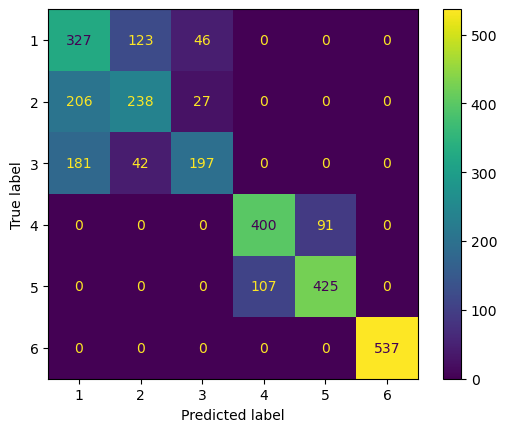

In [22]:
# Gerando a matriz de confusão
ConfusionMatrixDisplay.from_estimator(clf, X_test_best, y_test);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [26]:
# Escolhendo a variável de menor importância
clf1 = DecisionTreeClassifier().fit(X_train, y_train)
x = clf1.feature_importances_
resultado = pd.DataFrame({'features': x}, index=X_train.columns).sort_values(by='features')
resultado = resultado[resultado['features']>0]
resultado.head()

,features
"(79, 'tGravityAcc-correlation()-X,Z')",0.000081
"(60, 'tGravityAcc-iqr()-X')",0.000109
"(24, 'tBodyAcc-entropy()-Y')",0.000109
"(328, 'fBodyAcc-bandsEnergy()-49,64')",0.000161
"(291, 'fBodyAcc-maxInds-X')",0.000163


In [49]:
# Criando a variável binária para a classe específica
X_train['var_binaria'] = (X_train["(79, 'tGravityAcc-correlation()-X,Z')"] == 1)
X_test['var_binaria'] = (X_test["(79, 'tGravityAcc-correlation()-X,Z')"] == 1)

# Criando uma árvore de classificação simples para a variável binária
clf_var_binaria = DecisionTreeClassifier(random_state=23, min_samples_leaf=20, max_depth=4).fit(X_train, y_train)

# Obtendo as importâncias das variáveis da árvore de classificação para a variável binária
importancias_var_binaria = clf_var_binaria.feature_importances_

# Ordenando as variáveis por importância e selecionando as 3 com maior importância
melhores_variaveis = pd.DataFrame({'features': importancias_var_binaria}, index=X_train.columns).sort_values(by='features', ascending=False).head(3)
melhores_variaveis = melhores_variaveis.index
melhores_variaveis

Index(['(53, 'tGravityAcc-min()-X')',
       '(394, 'fBodyAccJerk-bandsEnergy()-1,24')',
       '(560, 'angle(Y,gravityMean)')'],
      dtype='object')

In [50]:
# Criando uma nova árvore com as 3 melhores variáveis selecionadas
clf_melhores_variaveis = DecisionTreeClassifier(random_state=23, min_samples_leaf=20, max_depth=4).fit(X_train[melhores_variaveis], y_train)

# Calculando a acurácia da nova árvore na base de testes
acuracia_teste_melhores_variaveis = clf_melhores_variaveis.score(X_test[melhores_variaveis], y_test)
print(f'Acurácia com as 3 melhores variáveis: {acuracia_teste_melhores_variaveis*100:.2f}%')

Acurácia com as 3 melhores variáveis: 71.84%
